### Notes 4-1-17
- make drug spending on Medicare make sense to the lay-person
- make this user friendly for anyone to check out and see what's being spent where

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
pd.options.display.max_columns = 120

In [7]:
drug_uses = pd.read_csv('data/drug_uses.csv')
drug_uses.head()

,Unnamed: 0,drugname_brand,drugname_generic,anatomical,therapeutic,pharmacologic,chemical,substance,name
0,0,8-MOP,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,PSORALENS FOR TOPICAL USE,METHOXSALEN,METHOXSALEN
1,1,8-MOP,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,PSORALENS FOR SYSTEMIC USE,METHOXSALEN,METHOXSALEN
2,2,OXSORALEN,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,PSORALENS FOR TOPICAL USE,METHOXSALEN,METHOXSALEN
3,3,OXSORALEN,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,PSORALENS FOR SYSTEMIC USE,METHOXSALEN,METHOXSALEN
4,4,ABILIFY,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE


In [17]:
df_nda = pd.read_csv('data/FDA_NDC_Product.csv')
df_nda['NONPROPRIETARYNAME'] = df_nda['NONPROPRIETARYNAME'].apply( lambda x: str(x).upper())
df_nda.head(5)

,PRODUCTID,PRODUCTNDC,PRODUCTTYPENAME,PROPRIETARYNAME,PROPRIETARYNAMESUFFIX,NONPROPRIETARYNAME,DOSAGEFORMNAME,ROUTENAME,STARTMARKETINGDATE,ENDMARKETINGDATE,MARKETINGCATEGORYNAME,APPLICATIONNUMBER,LABELERNAME,SUBSTANCENAME,ACTIVE_NUMERATOR_STRENGTH,ACTIVE_INGRED_UNIT,PHARM_CLASSES,DEASCHEDULE
0,0002-1200_e62214a4-82fd-4e06-90a0-577a32fea93f,0002-1200,HUMAN PRESCRIPTION DRUG,Amyvid,NaN,FLORBETAPIR F 18,"INJECTION, SOLUTION",INTRAVENOUS,20120601.0,NaN,NDA,NDA202008,Eli Lilly and Company,FLORBETAPIR F-18,51,mCi/mL,"Radioactive Diagnostic Agent [EPC],Positron Em...",NaN
1,0002-1407_e7af3676-cd9d-4c30-b127-9f6c46ff1589,0002-1407,HUMAN PRESCRIPTION DRUG,Quinidine Gluconate,NaN,QUINIDINE GLUCONATE,SOLUTION,INTRAVENOUS,19510301.0,NaN,NDA,NDA007529,Eli Lilly and Company,QUINIDINE GLUCONATE,80,mg/mL,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",NaN
2,0002-1433_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1433,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,0.75,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
3,0002-1434_a084daa7-c0a0-4996-9fe0-3c1df22c01c7,0002-1434,HUMAN PRESCRIPTION DRUG,Trulicity,NaN,DULAGLUTIDE,"INJECTION, SOLUTION",SUBCUTANEOUS,20141107.0,NaN,BLA,BLA125469,Eli Lilly and Company,DULAGLUTIDE,1.5,mg/.5mL,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",NaN
4,0002-1445_ad2261c2-3be8-4add-8274-0cc565d86ffb,0002-1445,HUMAN PRESCRIPTION DRUG,TALTZ,NaN,IXEKIZUMAB,"INJECTION, SOLUTION",SUBCUTANEOUS,20160322.0,NaN,BLA,BLA125521,Eli Lilly and Company,IXEKIZUMAB,80,mg/mL,"Interleukin-17A Antagonist [EPC],Interleukin-1...",NaN


In [30]:
df_generic_to_use = df_nda[['NONPROPRIETARYNAME','PHARM_CLASSES', 'LABELERNAME']].drop_duplicates()
df_generic_to_use.head()

,NONPROPRIETARYNAME,PHARM_CLASSES,LABELERNAME
0,FLORBETAPIR F 18,"Radioactive Diagnostic Agent [EPC],Positron Em...",Eli Lilly and Company
1,QUINIDINE GLUCONATE,"Antiarrhythmic [EPC],Cytochrome P450 2D6 Inhib...",Eli Lilly and Company
2,DULAGLUTIDE,"GLP-1 Receptor Agonist [EPC],Glucagon-Like Pep...",Eli Lilly and Company
4,IXEKIZUMAB,"Interleukin-17A Antagonist [EPC],Interleukin-1...",Eli Lilly and Company
5,TESTOSTERONE,"Androgen [EPC],Androgen Receptor Agonists [MoA...",Eli Lilly and Company


In [14]:
df_part_d = pd.read_csv('data/Medicare_Drug_Spending_PartD_All_Drugs_YTD_2015_12_06_2016/Data-Table 1.csv')
df_part_d.head()

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015"
0,10 WASH,SULFACETAMIDE SODIUM,24.0,"$1,569.19",16.0,$98.07,5170.0,$0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1ST TIER UNIFINE PENTIPS,"PEN NEEDLE, DIABETIC",2472.0,"$57,666.73",893.0,$64.58,293160.0,$0.20,422.0,$42.35,471.0,$7.55,3486.0,"$75,786.01",1261.0,$60.10,405484.0,$0.19,607.0,$38.24,654.0,$6.50,4413.0,"$95,304.09",1633.0,$58.36,522780.0,$0.18,833.0,$35.62,800.0,$5.88,6788.0,"$150,749.66",2769.0,$54.44,813255.0,$0.19,1481.0,$32.14,1288.0,$5.13,10749.0,"$257,895.63",5173.0,$49.85,1335132.0,$0.19,2878.0,$27.31,2295.0,$3.99,2%
2,1ST TIER UNIFINE PENTIPS PLUS,"PEN NEEDLE, DIABETIC",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1137.0,"$27,282.97",619.0,$44.08,137290.0,$0.20,313.0,$23.87,306.0,$2.62,2943.0,"$73,396.65",1470.0,$49.93,369886.0,$0.20,710.0,$28.07,760.0,$3.51,NaN
3,60PSE-400GFN-20DM,GUAIFENESIN/DM/PSEUDOEPHEDRINE,12.0,$350.10,11.0,$31.83,497.0,$0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8-MOP,METHOXSALEN,11.0,"$9,003.26",NaN,NaN,298.0,$30.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,"$19,590.75",NaN,NaN,750.0,$26.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.strip())
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('HCL','HYDROCHLORIDE'))
df_part_d['Generic Name'] = df_part_d['Generic Name'].apply(lambda x: x.replace('PHOSP','PHOSPHATE'))

In [31]:
df = pd.merge(left = df_part_d, right = df_generic_to_use,how='left',left_on='Generic Name',right_on='NONPROPRIETARYNAME')

In [32]:
df.sort_values(by='PHARM_CLASSES',inplace = True)
df.drop_duplicates(subset = ['Brand Name','Generic Name'],inplace=True)
df.head()

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015",NONPROPRIETARYNAME,PHARM_CLASSES,LABELERNAME
68599,ZYFLO CR,ZILEUTON,7478.0,"$5,142,822.20",1750.0,"$2,938.76",945360.0,$5.44,817.0,$503.21,933.0,$16.47,7687.0,"$9,477,538.42",1734.0,"$5,465.71",989350.0,$9.58,850.0,$655.75,884.0,$13.66,7413.0,"$15,162,169.97",1621.0,"$9,353.59",1045439.0,$14.50,904.0,$709.69,717.0,$17.61,6409.0,"$16,833,688.91",1291.0,"$13,039.26",913912.0,$18.42,717.0,$920.59,574.0,$13.95,5188.0,"$17,740,462.32",1042.0,"$17,025.40",722507.0,$24.55,576.0,"$1,174.86",466.0,$17.85,33%,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Chiesi USA, Inc."
68598,ZYFLO,ZILEUTON,484.0,"$263,295.66",200.0,"$1,316.48",52467.0,$5.02,86.0,$308.68,114.0,$7.96,623.0,"$670,324.20",182.0,"$3,683.10",68142.0,$9.84,94.0,$383.22,88.0,$7.90,676.0,"$1,158,369.46",209.0,"$5,542.44",79261.0,$14.61,113.0,$441.13,96.0,$10.50,784.0,"$1,812,724.81",225.0,"$8,056.55",98751.0,$18.36,106.0,$530.62,119.0,$11.14,1256.0,"$4,051,932.65",423.0,"$9,579.04",165334.0,$24.51,230.0,$442.61,193.0,$5.56,NaN,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Aristos Phamaceuticals, Inc."
52026,PROSCAR,FINASTERIDE,5398.0,"$799,595.53",1466.0,$545.43,247916.0,$3.23,949.0,$246.33,517.0,$12.59,4910.0,"$778,192.19",1217.0,$639.43,236439.0,$3.29,835.0,$260.09,382.0,$14.74,6289.0,"$1,207,369.88",1556.0,$775.94,366145.0,$3.30,1376.0,$171.42,180.0,$14.06,6050.0,"$1,261,118.10",1470.0,$857.90,372196.0,$3.39,1300.0,$167.24,170.0,$15.28,5529.0,"$1,226,545.22",1340.0,$915.33,344600.0,$3.56,1197.0,$153.86,143.0,$13.30,5%,FINASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",McKesson Packaging Services Business Unit of M...
5378,AVODART,DUTASTERIDE,1631984.0,"$252,973,207.62",300083.0,$843.01,68997485.0,$3.67,200809.0,$270.09,99274.0,$25.87,1533625.0,"$262,661,376.67",279995.0,$938.09,67098537.0,$3.91,190250.0,$283.40,89745.0,$23.85,1597133.0,"$304,093,064.08",293723.0,"$1,035.31",81127287.0,$3.75,209863.0,$287.32,83860.0,$24.26,1494976.0,"$318,321,406.11",277616.0,"$1,146.62",69313927.0,$4.59,200416.0,$297.69,77200.0,$23.14,1044439.0,"$252,585,668.54",222735.0,"$1,134.02",48400878.0,$5.22,157929.0,$282.78,64806.0,$20.28,14%,DUTASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...","Actavis Pharma, Inc."
51872,PROPECIA,FINASTERIDE,475.0,"$49,160.14",107.0,$459.44,22591.0,$2.18,NaN,NaN,NaN,

In [35]:
df['PHARM_CLASSES'].fillna('Unknown',inplace=True)

In [36]:
df.head()

,Brand Name,Generic Name,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit (Weighted), 2011","Beneficiary Count No LIS, 2011","Average Beneficiary Cost Share No LIS, 2011","Beneficiary Count LIS, 2011","Average Beneficiary Cost Share LIS, 2011","Claim Count, 2012","Total Spending, 2012","Beneficiary Count, 2012","Total Annual Spending Per User, 2012","Unit Count, 2012","Average Cost Per Unit (Weighted), 2012","Beneficiary Count No LIS, 2012","Average Beneficiary Cost Share No LIS, 2012","Beneficiary Count LIS, 2012","Average Beneficiary Cost Share LIS, 2012","Claim Count, 2013","Total Spending, 2013","Beneficiary Count, 2013","Total Annual Spending Per User, 2013","Unit Count, 2013","Average Cost Per Unit (Weighted), 2013","Beneficiary Count No LIS, 2013","Average Beneficiary Cost Share No LIS, 2013","Beneficiary Count LIS, 2013","Average Beneficiary Cost Share LIS, 2013","Claim Count, 2014","Total Spending, 2014","Beneficiary Count, 2014","Total Annual Spending Per User, 2014","Unit Count, 2014","Average Cost Per Unit (Weighted), 2014","Beneficiary Count No LIS, 2014","Average Beneficiary Cost Share No LIS, 2014","Beneficiary Count LIS, 2014","Average Beneficiary Cost Share LIS, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit (Weighted), 2015","Beneficiary Count No LIS, 2015","Average Beneficiary Cost Share No LIS, 2015","Beneficiary Count LIS, 2015","Average Beneficiary Cost Share LIS, 2015","Annual Change in Average Cost Per Unit, 2015",NONPROPRIETARYNAME,PHARM_CLASSES,LABELERNAME
68599,ZYFLO CR,ZILEUTON,7478.0,"$5,142,822.20",1750.0,"$2,938.76",945360.0,$5.44,817.0,$503.21,933.0,$16.47,7687.0,"$9,477,538.42",1734.0,"$5,465.71",989350.0,$9.58,850.0,$655.75,884.0,$13.66,7413.0,"$15,162,169.97",1621.0,"$9,353.59",1045439.0,$14.50,904.0,$709.69,717.0,$17.61,6409.0,"$16,833,688.91",1291.0,"$13,039.26",913912.0,$18.42,717.0,$920.59,574.0,$13.95,5188.0,"$17,740,462.32",1042.0,"$17,025.40",722507.0,$24.55,576.0,"$1,174.86",466.0,$17.85,33%,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Chiesi USA, Inc."
68598,ZYFLO,ZILEUTON,484.0,"$263,295.66",200.0,"$1,316.48",52467.0,$5.02,86.0,$308.68,114.0,$7.96,623.0,"$670,324.20",182.0,"$3,683.10",68142.0,$9.84,94.0,$383.22,88.0,$7.90,676.0,"$1,158,369.46",209.0,"$5,542.44",79261.0,$14.61,113.0,$441.13,96.0,$10.50,784.0,"$1,812,724.81",225.0,"$8,056.55",98751.0,$18.36,106.0,$530.62,119.0,$11.14,1256.0,"$4,051,932.65",423.0,"$9,579.04",165334.0,$24.51,230.0,$442.61,193.0,$5.56,NaN,ZILEUTON,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Aristos Phamaceuticals, Inc."
52026,PROSCAR,FINASTERIDE,5398.0,"$799,595.53",1466.0,$545.43,247916.0,$3.23,949.0,$246.33,517.0,$12.59,4910.0,"$778,192.19",1217.0,$639.43,236439.0,$3.29,835.0,$260.09,382.0,$14.74,6289.0,"$1,207,369.88",1556.0,$775.94,366145.0,$3.30,1376.0,$171.42,180.0,$14.06,6050.0,"$1,261,118.10",1470.0,$857.90,372196.0,$3.39,1300.0,$167.24,170.0,$15.28,5529.0,"$1,226,545.22",1340.0,$915.33,344600.0,$3.56,1197.0,$153.86,143.0,$13.30,5%,FINASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",McKesson Packaging Services Business Unit of M...
5378,AVODART,DUTASTERIDE,1631984.0,"$252,973,207.62",300083.0,$843.01,68997485.0,$3.67,200809.0,$270.09,99274.0,$25.87,1533625.0,"$262,661,376.67",279995.0,$938.09,67098537.0,$3.91,190250.0,$283.40,89745.0,$23.85,1597133.0,"$304,093,064.08",293723.0,"$1,035.31",81127287.0,$3.75,209863.0,$287.32,83860.0,$24.26,1494976.0,"$318,321,406.11",277616.0,"$1,146.62",69313927.0,$4.59,200416.0,$297.69,77200.0,$23.14,1044439.0,"$252,585,668.54",222735.0,"$1,134.02",48400878.0,$5.22,157929.0,$282.78,64806.0,$20.28,14%,DUTASTERIDE,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...","Actavis Pharma, Inc."
51872,PROPECIA,FINASTERIDE,475.0,"$49,160.14",107.0,$459.44,22591.0,$2.18,NaN,NaN,NaN,

In [66]:
df_spending = df[['Brand Name', 'Generic Name', 'Total Spending, 2011', 'Total Spending, 2012', 'Total Spending, 2013',\
                 'Total Spending, 2014', 'Total Spending, 2015', 'PHARM_CLASSES', 'LABELERNAME']]
for i in range(2011, 2016):
    print i
    df_spending['Total Spending, '+str(i)] = df_spending['Total Spending, '+str(i)].str.replace(',', '')
    df_spending['Total Spending, '+str(i)] = df_spending['Total Spending, '+str(i)].str.replace('$', '')

df_spending[['Total Spending, 2011', 'Total Spending, 2012', 'Total Spending, 2013',\
                 'Total Spending, 2014', 'Total Spending, 2015']] = df_spending[['Total Spending, 2011', 'Total Spending, 2012', 'Total Spending, 2013',\
                 'Total Spending, 2014', 'Total Spending, 2015']].apply(pd.to_numeric)
    
df_spending.head()

2011
2012
2013
2014
2015


/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

,Brand Name,Generic Name,"Total Spending, 2011","Total Spending, 2012","Total Spending, 2013","Total Spending, 2014","Total Spending, 2015",PHARM_CLASSES,LABELERNAME
68599,ZYFLO CR,ZILEUTON,5.142822e+06,9.477538e+06,1.516217e+07,1.683369e+07,1.774046e+07,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Chiesi USA, Inc."
68598,ZYFLO,ZILEUTON,2.632957e+05,6.703242e+05,1.158369e+06,1.812725e+06,4.051933e+06,"5-Lipoxygenase Inhibitor [EPC],5-Lipoxygenase ...","Aristos Phamaceuticals, Inc."
52026,PROSCAR,FINASTERIDE,7.995955e+05,7.781922e+05,1.207370e+06,1.261118e+06,1.226545e+06,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...",McKesson Packaging Services Business Unit of M...
5378,AVODART,DUTASTERIDE,2.529732e+08,2.626614e+08,3.040931e+08,3.183214e+08,2.525857e+08,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...","Actavis Pharma, Inc."
51872,PROPECIA,FINASTERIDE,4.916014e+04,6.512616e+04,1.107439e+04,NaN,NaN,"5-alpha Reductase Inhibitor [EPC],5-alpha Redu...","Preferred Pharmaceuticals, Inc."


In [67]:
grouped = df_spending.groupby(['LABELERNAME'], as_index=False)['Total Spending, 2011', 'Total Spending, 2012', 'Total Spending, 2013',\
                 'Total Spending, 2014', 'Total Spending, 2015'].sum()


In [68]:
grouped.head()

,LABELERNAME,"Total Spending, 2011","Total Spending, 2012","Total Spending, 2013","Total Spending, 2014","Total Spending, 2015"
0,A-S Medication Solutions,8.540934e+08,1.464182e+09,1.744498e+09,2.021129e+09,2.547981e+09
1,A-S Medication Solutions LLC,7.909471e+08,7.444905e+08,9.374585e+08,9.737224e+08,1.146416e+09
2,ADIENNE SA,7.933210e+03,NaN,NaN,NaN,NaN
3,AGILA SPECIALTIES PRIVATE LIMITED,2.900501e+04,NaN,NaN,NaN,NaN
4,AGOURON,1.679842e+07,1.577261e+07,1.470314e+07,1.329950e+07,1.086502e+07


In [79]:
grouped['pharma_name']=''
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Pfizer")] = 'Pfizer'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Bristol")] = 'Bristol-Myers Squibb'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Lilly")] = 'Eli Lilly & Co'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Glaxo")] = 'GlaxoSmithKline'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Kline")] = 'GlaxoSmithKline'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Johnson")] = 'Johnson & Johnson'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Merck")] = 'Merck & Co'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Novartis")] = 'Novartis'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Allergan")] = 'Allergan'
grouped['pharma_name'][grouped['LABELERNAME'].str.contains("Actavis")] = 'Allergan'
company_total = grouped.groupby(['pharma_name'], as_index=False)['Total Spending, 2011', 'Total Spending, 2012', 'Total Spending, 2013',\
                 'Total Spending, 2014', 'Total Spending, 2015'].sum()

/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/geoffperrin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/geoffperrin/anaconda2/lib/python2.7/

In [81]:
company_total.head(10)

,pharma_name,"Total Spending, 2011","Total Spending, 2012","Total Spending, 2013","Total Spending, 2014","Total Spending, 2015"
0,,6.529375e+10,6.658506e+10,7.570355e+10,8.768688e+10,9.328325e+10
1,Allergan,9.151050e+08,1.043154e+09,1.271310e+09,1.572796e+09,1.702934e+09
2,Bristol-Myers Squibb,5.323263e+07,6.925614e+07,1.062744e+08,1.309751e+08,1.579559e+08
3,Eli Lilly & Co,4.927909e+08,5.338099e+08,6.647656e+08,8.159862e+08,1.007401e+09
4,GlaxoSmithKline,1.774126e+08,1.788762e+08,2.397845e+08,2.824148e+08,3.410365e+08
5,Merck & Co,2.396787e+08,2.724334e+08,2.825358e+08,2.390320e+08,2.505939e+08
6,Novartis,4.201928e+08,5.492391e+08,7.047772e+08,8.031595e+08,9.639139e+08
7,Pfizer,1.102122e+09,1.349698e+09,1.741017e+09,2.165747e+09,2.593222e+09


In [82]:
data_folder = '/Users/geoffperrin/Desktop/Data4Democracy/drug-spending/python/timeseries_analysis/data'

In [83]:
pharma_lobby = pd.read_csv(data_folder + '/Pharma_Lobby.csv')
pharma_lobby = pharma_lobby[['client', 'sub', 'total', 'year']]
pharma_lobby.head(5)

,client,sub,total,year
0,SmithKline Beecham,SmithKline Beecham,2680000.0,1998
1,Hoechst Corp,Hoechst Marion Roussel,840000.0,1998
2,Glaxo Wellcome Inc,Glaxo Wellcome Inc,3120000.0,1998
3,GlaxoSmithKline,GlaxoSmithKline,4860000.0,2005
4,GlaxoSmithKline,GlaxoSmithKline,4920000.0,2012


In [84]:
dates = pd.date_range('1998', '2015', freq='A')

In [85]:
df_dates = pd.DataFrame(dates.year)
df_dates.columns = ['year']

In [86]:
pharma_lobby_dates = df_dates.merge(pharma_lobby, on='year', how='left')
pharma_lobby_dates.head()

,year,client,sub,total
0,1998,SmithKline Beecham,SmithKline Beecham,2680000.0
1,1998,Hoechst Corp,Hoechst Marion Roussel,840000.0
2,1998,Glaxo Wellcome Inc,Glaxo Wellcome Inc,3120000.0
3,1998,Bristol-Myers Squibb,Bristol-Myers Squibb,2820579.0
4,1998,GlaxoSmithKline,GlaxoSmithKline,220000.0


In [87]:
#take top 50 pharmas
pharma_totals = pharma_lobby_dates.groupby(by='client', as_index=False)['client', 'total'].sum()
pharma_totals.sort_values(['total'], inplace=True, ascending=False)
top_50_pharmas = pharma_totals['client'].head(10)

In [88]:
pharma_lobby_dates_50 = pharma_lobby_dates[pharma_lobby_dates['client'].isin(top_50_pharmas)]
pharma_lobby_dates_50 = pharma_lobby_dates_50.groupby(by=['client', 'year'], as_index=False)['year', 'client', 'total'].sum()

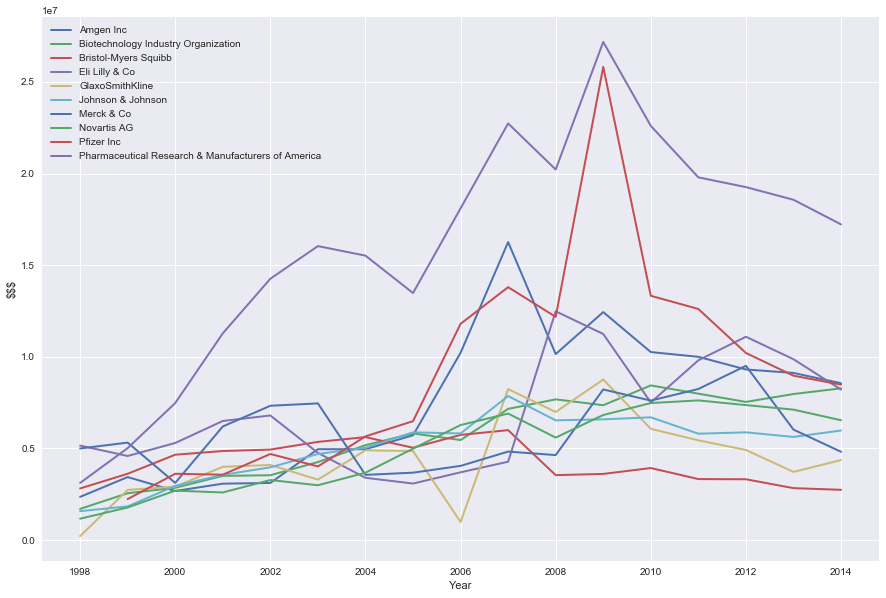

In [89]:
plt.figure(figsize=(15,10))
for i in pharma_lobby_dates_50.client.unique():
    df = pharma_lobby_dates_50[pharma_lobby_dates_50['client']==i]
    name = i
    plt.plot(df.year, df.total, linewidth=2.0, label=name)
    plt.ylabel('$$$')
    plt.xlabel('Year')
    #plt.title('MTA Ridership (Top 4 52-week Periodicity Stations) Total Weekly Ridership Chart')
    plt.legend()
    
plt.show()